In [1]:
!pip install scikit-learn pandas numpy kagglehub
!pip install kagglehub[pandas-datasets]

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

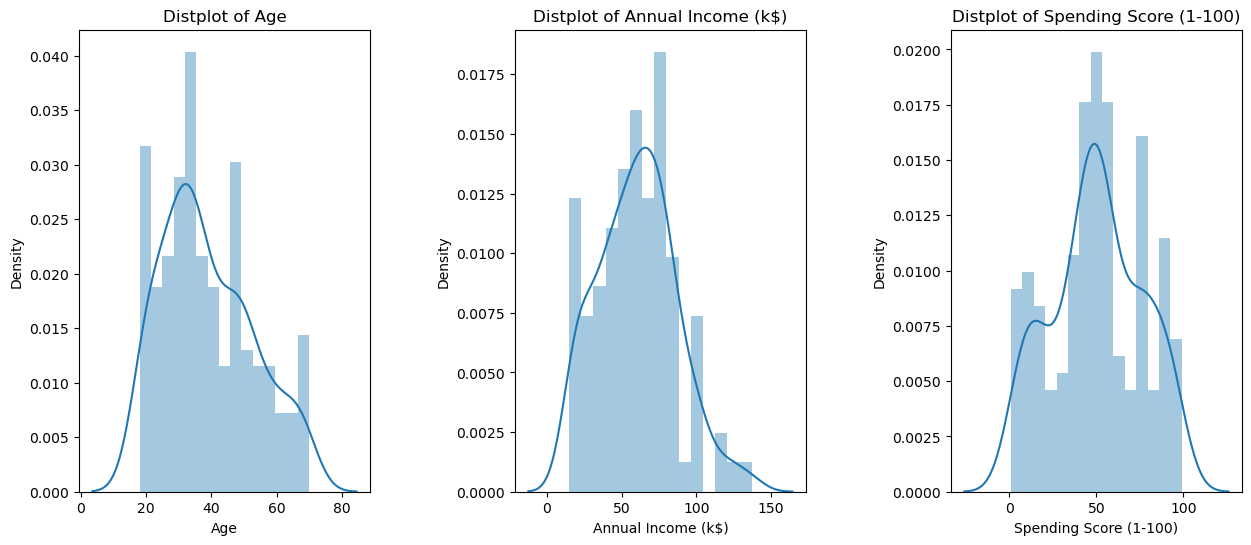

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

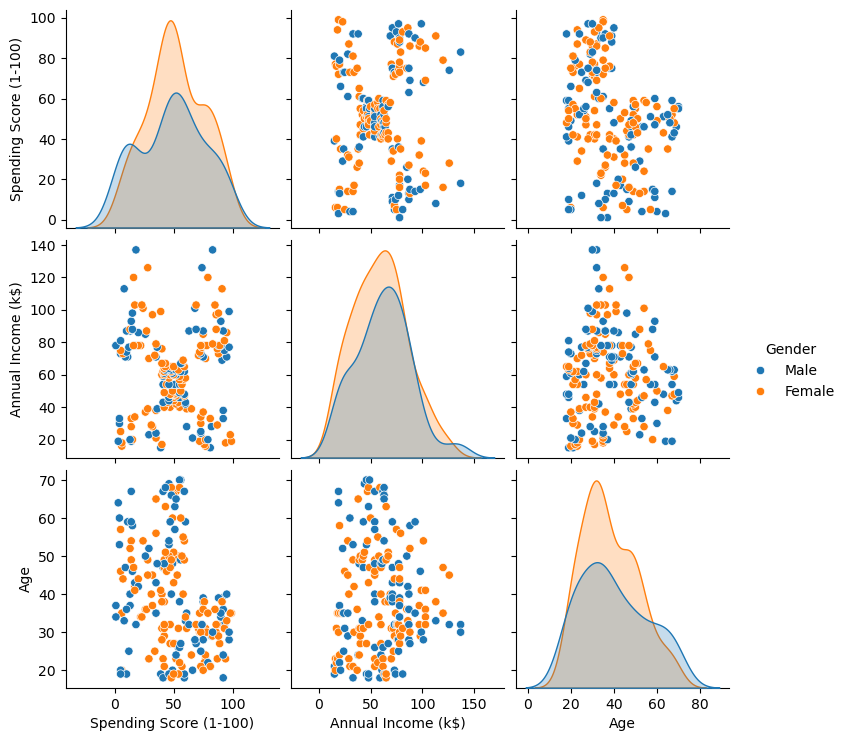

In [8]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

In [9]:
a = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')

In [10]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []

In [11]:
a.fit(X1)
l = a.labels_
c = a.cluster_centers_

In [12]:
l

array([0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 3, 1, 0, 1,
       3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 0,
       3, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [13]:
c

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

In [14]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

print(x_min, x_max, y_min, y_max)

17 71 0 100


In [15]:
h = 0.02
x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [16]:
p = a.predict(np.c_[x.ravel(), y.ravel()])

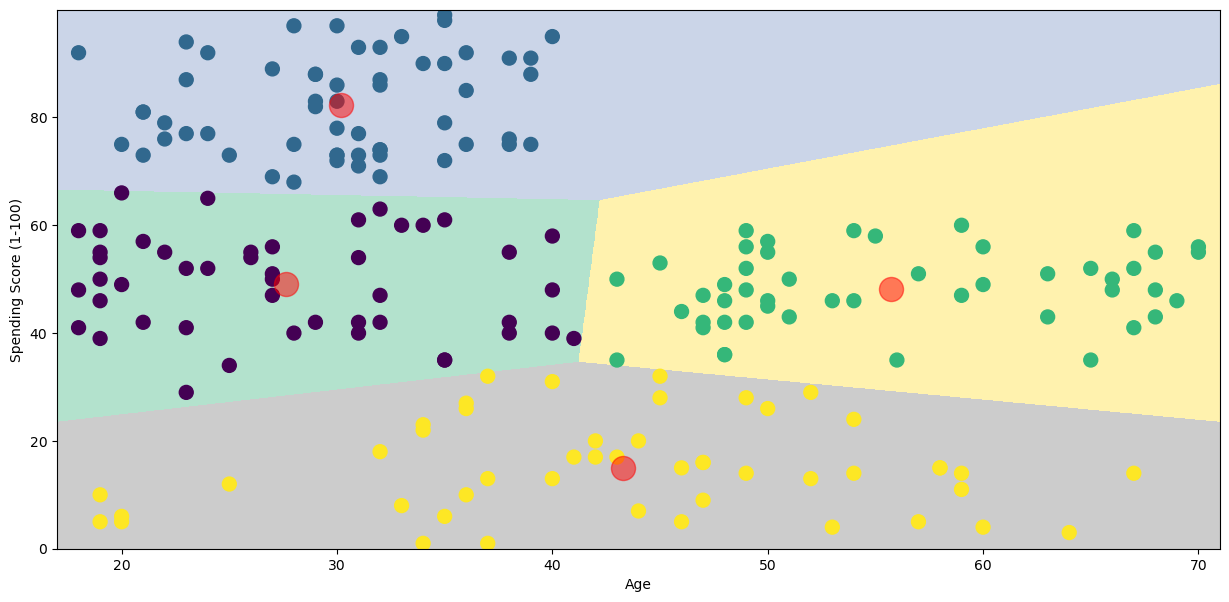

In [17]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
p = p.reshape(x.shape)
plt.imshow(p , interpolation='nearest', 
           extent=(x.min(), x.max(), y.min(), y.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = l, s = 100)
plt.scatter(x = c[: , 0] , y =  c[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

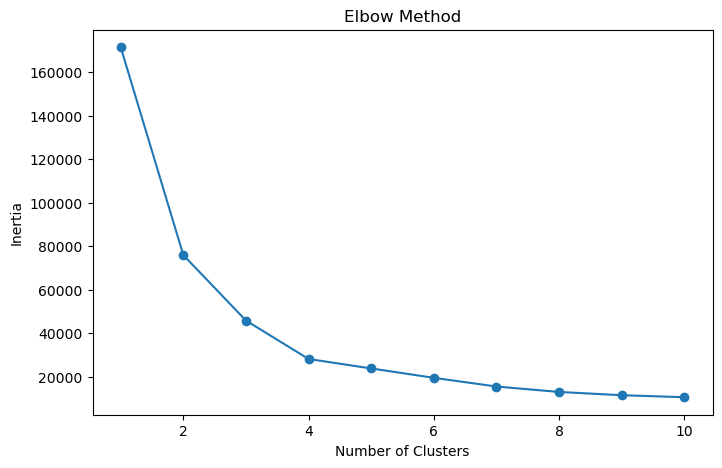

In [18]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=111
    )
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

a = KMeans(n_clusters=4, random_state=111)
a.fit(X1_scaled)



,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,111
,copy_x,True
,algorithm,'lloyd'


In [20]:
df['Cluster'] = a.labels_
df['Cluster']

0      0
1      2
2      0
3      2
4      0
      ..
195    2
196    1
197    2
198    1
199    2
Name: Cluster, Length: 200, dtype: int32

In [21]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

In [22]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

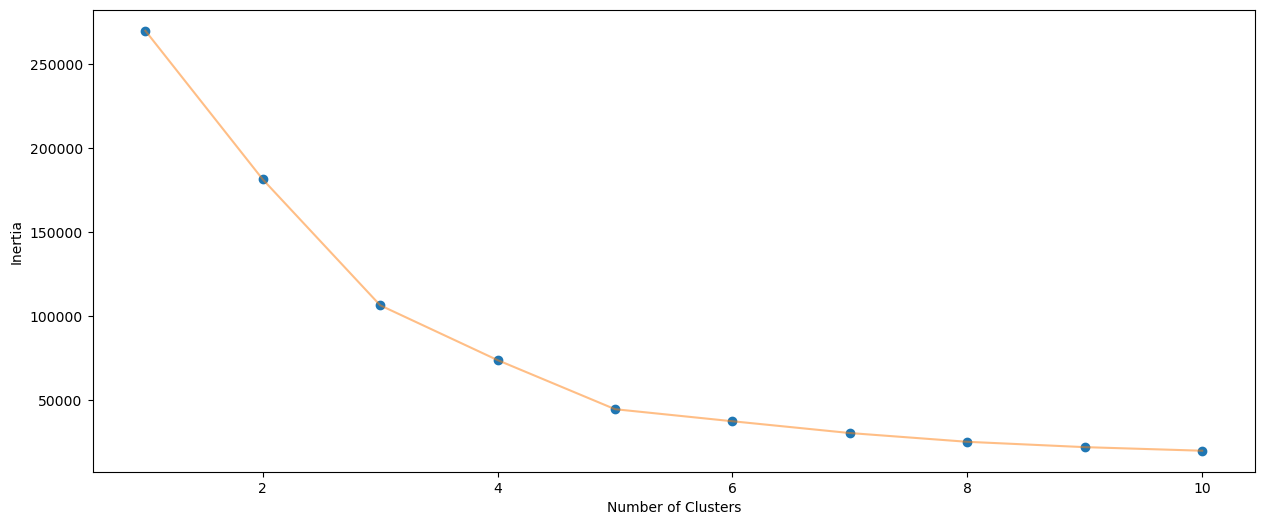

In [23]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [24]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

In [25]:
h = 0.02
x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [26]:
p = algorithm.predict(np.c_[x.ravel(), y.ravel()])

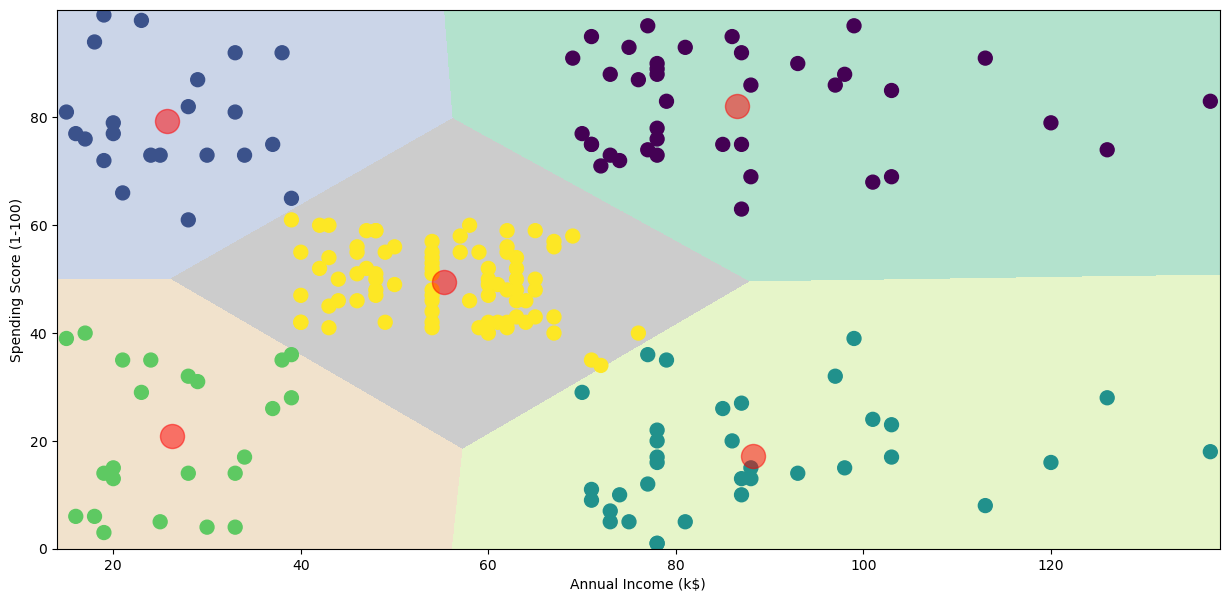

In [27]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
p = p.reshape(x.shape)
plt.imshow(p , interpolation='nearest', 
           extent=(x.min(), x.max(), y.min(), y.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels2, s = 100)
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [29]:
s_score = silhouette_score(X1, l)
s_score

0.49973941540141753

In [30]:
davies_bouldin_score(X1, l)

0.6869328339833629

In [31]:
calinski_harabasz_score(X1, l)

332.56312684433055

In [32]:
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=111)
    labels = km.fit_predict(X2)

    print(f"k = {k}")
    print("  Silhouette:", silhouette_score(X1, labels))
    print("  Davies-Bouldin:", davies_bouldin_score(X1, labels))
    print("  Calinski-Harabasz:", calinski_harabasz_score(X1, labels))
    print("-" * 30)


k = 2
  Silhouette: 0.4096874380401205
  Davies-Bouldin: 0.8742237381809403
  Calinski-Harabasz: 204.38654615289775
------------------------------
k = 3
  Silhouette: -0.04472935607858565
  Davies-Bouldin: 3.2502007883899235
  Calinski-Harabasz: 20.45370874269578
------------------------------
k = 4
  Silhouette: 0.16014110800665995
  Davies-Bouldin: 1.8663398601105408
  Calinski-Harabasz: 113.65094697750523
------------------------------
k = 5
  Silhouette: 0.16345864898588927
  Davies-Bouldin: 3.332310797185206
  Calinski-Harabasz: 128.79589153155885
------------------------------
k = 6
  Silhouette: 0.0497923438857132
  Davies-Bouldin: 4.595800714414934
  Calinski-Harabasz: 103.7803998797202
------------------------------
k = 7
  Silhouette: 0.00048488315819889216
  Davies-Bouldin: 9.323555295120668
  Calinski-Harabasz: 85.91756447828192
------------------------------
k = 8
  Silhouette: -0.03696587361694001
  Davies-Bouldin: 8.842569340025609
  Calinski-Harabasz: 74.64027884769577
